# YOLO Pitch Detection and Transformation

## Training

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/charankandasamyraja/soccer-data/group_coordinates.txt
/kaggle/input/d/charankandasamyraja/soccer-data/modified_train_homo_data.json
/kaggle/input/d/charankandasamyraja/soccer-data/world_cup_template.png
/kaggle/input/d/charankandasamyraja/soccer-data/train_val/155_grass_gt.mat
/kaggle/input/d/charankandasamyraja/soccer-data/train_val/10_grass_gt.mat
/kaggle/input/d/charankandasamyraja/soccer-data/train_val/39.homographyMatrix
/kaggle/input/d/charankandasamyraja/soccer-data/train_val/47.homographyMatrix
/kaggle/input/d/charankandasamyraja/soccer-data/train_val/110_grass_gt.mat
/kaggle/input/d/charankandasamyraja/soccer-data/train_val/208.jpg
/kaggle/input/d/charankandasamyraja/soccer-data/train_val/110.homographyMatrix
/kaggle/input/d/charankandasamyraja/soccer-data/train_val/140.homographyMatrix
/kaggle/input/d/charankandasamyraja/soccer-data/train_val/20_grass_gt.mat
/kaggle/input/d/charankandasamyraja/soccer-data/train_val/113_grass_gt.mat
/kaggle/input/d/charankandas

In [2]:
# Install required packages
!pip install ultralytics torch pyyaml roboflow

import torch
from ultralytics import YOLO  # Correct import
import os
from pathlib import Path
import yaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.7/901.7 kB 23.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9N31QqA9lFJWGU9r4lhV")
project = rf.workspace("roboflow-jvuqo").project("football-field-detection-f07vi")
version = project.version(15)
dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-field-detection-15 in yolov8:: 100%|██████████| 646/646 [00:00<00:00, 6676.18it/s]


In [4]:
import os
import yaml

YAML_PATH = os.path.join(dataset.location,"data.yaml")

with open(YAML_PATH) as f:
     list_doc = yaml.safe_load(f)

list_doc['test'] = '../test/images'
list_doc['train'] = '../train/images'
list_doc['val'] = '../valid/images'

print(list_doc)

with open(YAML_PATH, "w") as f:
    yaml.dump(list_doc, f)

{'flip_idx': [24, 25, 26, 27, 28, 29, 22, 23, 21, 17, 18, 19, 20, 13, 14, 15, 16, 9, 10, 11, 12, 8, 6, 7, 0, 1, 2, 3, 4, 5, 31, 30], 'kpt_shape': [32, 3], 'names': ['pitch'], 'nc': 1, 'roboflow': {'license': 'CC BY 4.0', 'project': 'football-field-detection-f07vi', 'url': 'https://universe.roboflow.com/roboflow-jvuqo/football-field-detection-f07vi/dataset/15', 'version': 15, 'workspace': 'roboflow-jvuqo'}, 'test': '../test/images', 'train': '../train/images', 'val': '../valid/images'}


In [5]:
!yolo task=pose mode=train model=yolo11n-pose.pt data={YAML_PATH} batch=32 epochs=500 patience=40 imgsz=640 mosaic=0.0 plots=True cache=False


100%|███████████████████████████████████████| 5.97M/5.97M [00:00<00:00, 111MB/s]
Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=pose, mode=train, model=yolo11n-pose.pt, data=/kaggle/working/football-field-detection-15/data.yaml, epochs=500, time=None, patience=40, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sh

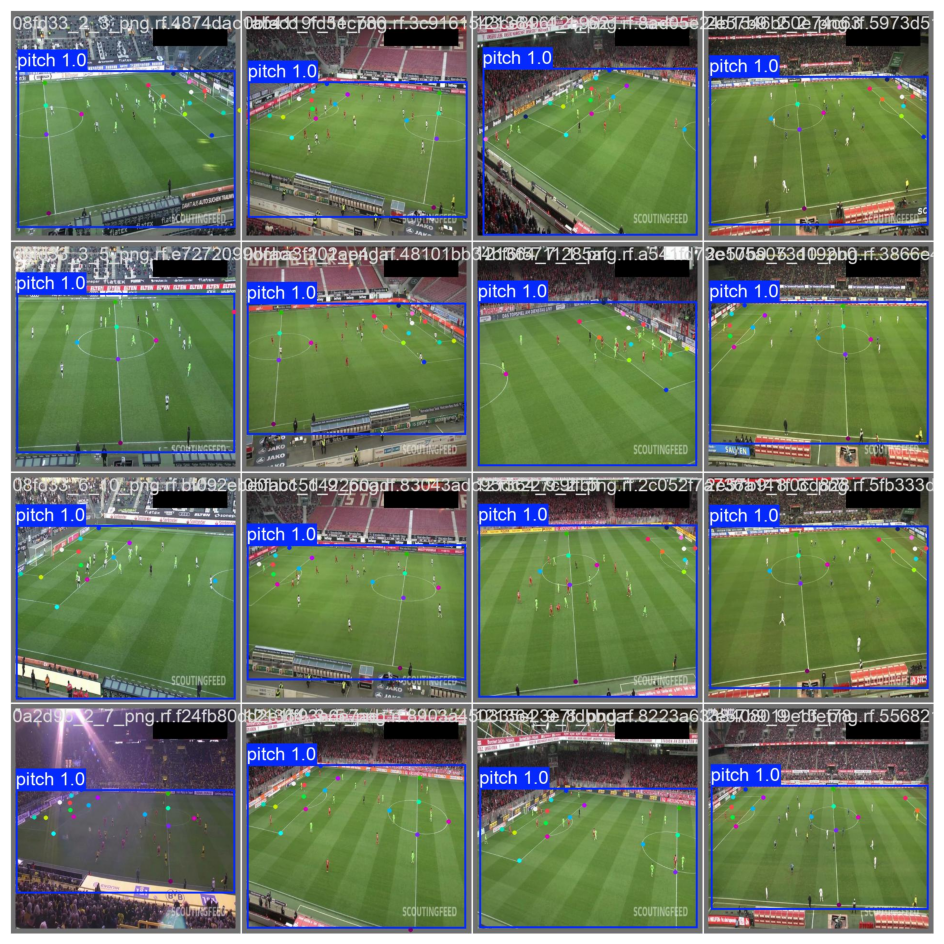

In [27]:
RESULTS_DIR = 'runs/pose/train/'
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12,12))
plt.axis(False)
plt.imshow(mpimg.imread(f'{RESULTS_DIR}/val_batch0_pred.jpg'))

plt.show()

## Pitch Transformation

In [7]:
import cv2

# Load the finetuned YOLO11n model
model = YOLO("/kaggle/input/yolopose/other/default/1/last.pt")


0: 640x640 1 pitch, 10.5ms
Speed: 6.2ms preprocess, 10.5ms inference, 162.8ms postprocess per image at shape (1, 3, 640, 640)


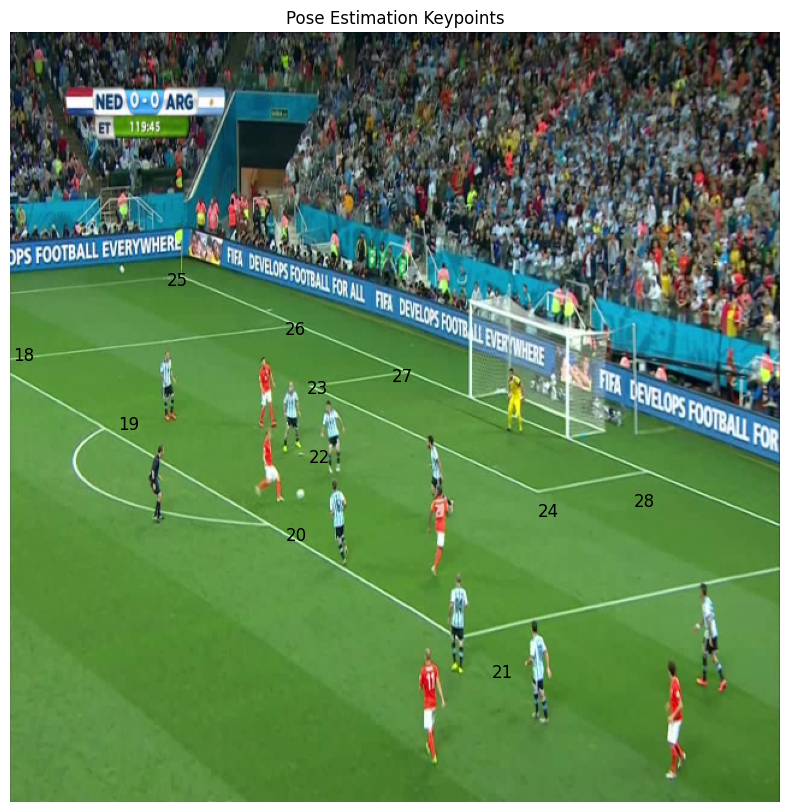

In [8]:
###### import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the YOLO model


# Read the image
image_path = "/kaggle/input/d/charankandasamyraja/soccer-data/train_val/3.jpg"
source = cv2.imread(image_path)

# Resize the image to 640x640
source = cv2.resize(source, (640, 640))

# Convert the image from BGR (OpenCV default) to RGB for correct display in Matplotlib

# Convert BGR to RGB for displaying later
source_rgb = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)

# Run inference
results = model(source)

# Plot the resized image
plt.figure(figsize=(10, 10))
plt.imshow(source_rgb)
plt.axis('off')  # Hide axes

pt_list={}
# Get keypoints from the results
for r in results:
    keypoints = r.keypoints.xy[0]  # Extract keypoints for the first detection
    confidences = r.keypoints.conf[0]  # Extract confidence for each keypoint

    # Plot keypoints on the image as numbers
    for idx, (point, confidence) in enumerate(zip(keypoints, confidences), start=1):
        x, y = point  # Unpack the point coordinates
        if confidence > 0.5:  # Only plot keypoints with confidence > 0.5
            # Use plt.text() to plot the point number
            pt_list[str(idx)]=[int(x),int(y)]
            plt.text(x, y, str(idx), color='black', fontsize=12, ha='center', va='center')

plt.title("Pose Estimation Keypoints")
plt.show()


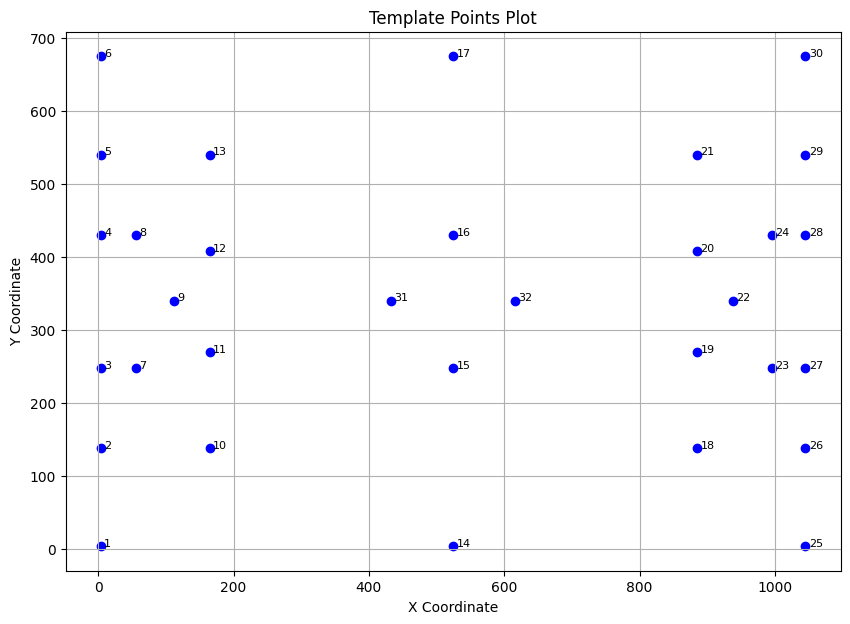

In [9]:
template_points = {
    '1': [4, 4],
    '2': [4, 138],
    '3': [4, 248],
    '4': [4, 430],
    '5': [4, 540],
    '6': [4, 675],
    '7': [56, 248],
    '8': [56, 430],
    '9': [112, 340],
    '10': [165, 138],
    '11': [165, 270],
    '12': [165, 408],
    '13': [165, 540],
    '31': [433, 340],
    '14': [525, 4],
    '15': [525, 248],
    '16': [525, 430],
    '17': [525, 675],
    '32': [616, 340],
    '18': [885, 138],
    '19': [885, 270],
    '20': [885, 408],
    '21': [885, 540],
    '22': [938, 340],
    '23': [995, 248],
    '24': [995, 430],
    '25': [1045, 4],
    '26': [1045, 138],
    '27': [1045, 248],
    '28': [1045, 430],
    '29': [1045, 540],
    '30': [1045, 675]
}
final_template=template_points

import matplotlib.pyplot as plt


# Extract coordinates and labels
x_coords = [point[0] for point in template_points.values()]
y_coords = [point[1] for point in template_points.values()]
labels = list(template_points.keys())

# Plot points
plt.figure(figsize=(10, 7))
plt.scatter(x_coords, y_coords, color='blue')

# Annotate each point with its label
for label, x, y in zip(labels, x_coords, y_coords):
    plt.text(x + 5, y, label, fontsize=8)

# Add axis labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Template Points Plot')
plt.grid(True)
plt.show()


In [10]:
pt_list

{'18': [11, 268],
 '19': [97, 326],
 '20': [237, 418],
 '21': [409, 531],
 '22': [256, 353],
 '23': [254, 295],
 '24': [447, 398],
 '25': [138, 206],
 '26': [236, 246],
 '27': [325, 286],
 '28': [526, 389]}

In [11]:
img_list = []
template_list = []
for key in pt_list.keys():
    img_list.append(pt_list[key])
    template_list.append(template_points[key])

In [12]:
def resize_coordinates(coords, old_width=640, old_height=640, new_width=1280, new_height=720):
    # Calculate scaling factors for both axes
    scale_x = new_width / old_width
    scale_y = new_height / old_height

    # Resize the coordinates
    resized_coords = [(int(x * scale_x), int(y * scale_y)) for x, y in coords]

    return resized_coords

In [13]:
img_list = resize_coordinates(img_list)
img_list

[(22, 301),
 (194, 366),
 (474, 470),
 (818, 597),
 (512, 397),
 (508, 331),
 (894, 447),
 (276, 231),
 (472, 276),
 (650, 321),
 (1052, 437)]

In [14]:
template_list

[[885, 138],
 [885, 270],
 [885, 408],
 [885, 540],
 [938, 340],
 [995, 248],
 [995, 430],
 [1045, 4],
 [1045, 138],
 [1045, 248],
 [1045, 430]]

In [15]:
import numpy as np

def compute_homography(src_points, dst_points):
    """
    Computes the homography matrix from corresponding points.

    Parameters:
    - src_points: A list of points from the source image (each point is a tuple (x, y)).
    - dst_points: A list of corresponding points from the destination image.

    Returns:
    - H: A 3x3 homography matrix.
    """
    # Make sure there are at least 4 points
    if len(src_points) < 4 or len(dst_points) < 4:
        raise ValueError("At least 4 corresponding points are required.")
    
    # Prepare the matrix A (8 equations from 4 point pairs)
    A = []

    for i in range(4):
        x, y = src_points[i]
        x_prime, y_prime = dst_points[i]

        # Two equations per point pair
        A.append([-x, -y, -1, 0, 0, 0, x * x_prime, y * x_prime, x_prime])
        A.append([0, 0, 0, -x, -y, -1, x * y_prime, y * y_prime, y_prime])

    # Convert A to a numpy array
    A = np.array(A)

    # Apply SVD to solve for homography matrix H
    _, _, V = np.linalg.svd(A)

    # The homography vector is the last row of V (corresponding to the smallest singular value)
    h = V[-1]

    # Reshape h into the 3x3 matrix
    H = h.reshape(3, 3)

    return H

# Example points (source and destination points should be corresponding points in the images)
src_points = img_list  # Example points in source image
dst_points = template_list  # Example corresponding points in destination image

# Compute the homography matrix
H= compute_homography(src_points, dst_points)

print("Homography Matrix:")
print(H)


Homography Matrix:
[[-0.00013695  0.00039631   -0.037642]
 [ -0.0012319   0.0034507    -0.99928]
 [-1.5475e-07  4.4781e-07 -4.2534e-05]]


In [16]:
import json
with open('/kaggle/input/d/charankandasamyraja/soccer-data/modified_train_homo_data.json', 'r') as file:
    ground_homo_dict = json.load(file)

In [17]:
def frobenius_norm(A, B):
    """
    Computes the Frobenius norm between two matrices A and B.
    
    Parameters:
    - A: First matrix (numpy array)
    - B: Second matrix (numpy array)
    
    Returns:
    - Frobenius norm score between matrices A and B
    """
    # Ensure matrices have the same shape
    if A.shape != B.shape:
        raise ValueError("Matrices A and B must have the same shape.")
    
    # Compute the Frobenius norm of the difference between A and B
    norm = np.linalg.norm(A - B, 'fro')
    return norm

In [18]:
import numpy as np
import cv2

# Define the matched points
source=np.array(img_list, dtype=np.float32)
template_points = np.array(template_list, dtype=np.float32)

# Compute the homography matrix
H, status = cv2.findHomography(source, template_points)

# Display the homography matrix
print("Homography Matrix:")
print(H)

# Optional: Visualize status (inliers = 1, outliers = 0)
print("\nStatus Array:")
print(status.ravel())


Homography Matrix:
[[    0.97126      4.8488      1704.8]
 [    0.37979      8.3198     -2010.7]
 [ -0.0001164   0.0086732           1]]

Status Array:
[1 1 1 1 1 1 1 1 1 1 1]


In [19]:
H

array([[    0.97126,      4.8488,      1704.8],
       [    0.37979,      8.3198,     -2010.7],
       [ -0.0001164,   0.0086732,           1]])

In [20]:
import numpy as np

# Define a function to parse the coordinates from the text file
def parse_coordinates(file_path):
    source_points = []
    source_points2 = []
    source_points3 = []

    with open(file_path, 'r') as file:
        group = None
        for line in file:
            line = line.strip()
            if line.startswith("Group 1 Coordinates:"):
                group = 1
            elif line.startswith("Group 2 Coordinates:"):
                group = 2
            elif line.startswith("Group 3 Coordinates:"):
                group = 3
            elif line.startswith("("):  # This indicates a coordinate line
                x, y = map(int, line.strip("()").split(","))
                if group == 1:
                    source_points.append((x, y))
                elif group == 2:
                    source_points2.append((x, y))
                elif group == 3:
                    source_points3.append((x, y))
    return np.array(source_points, dtype=np.float32), np.array(source_points2, dtype=np.float32), np.array(source_points3, dtype=np.float32)

# Example usage
file_path = "/kaggle/input/d/charankandasamyraja/soccer-data/group_coordinates.txt"  # Replace with the path to your file
source_points, source_points2,source_points3 = parse_coordinates(file_path)

print("source_points =", source_points)
print("source_points2 =", source_points2)
print("source_points3 =", source_points3)



source_points = [[        432         370]
 [        712         508]
 [        702         689]
 [       1108         703]
 [        434         442]]
source_points2 = [[       1168         617]
 [        882         649]
 [        744         604]
 [        548         500]
 [        538         419]
 [        270         364]
 [        472         397]]
source_points3 = [[        242         459]
 [        844         379]]


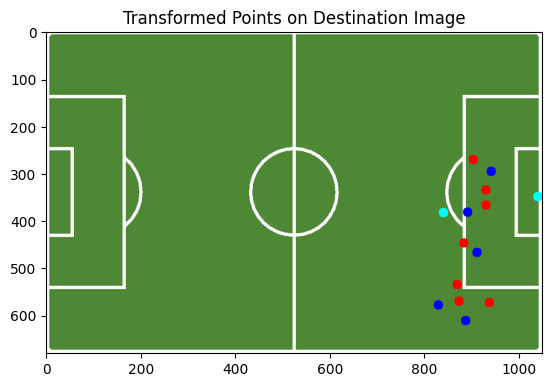

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt




# Convert to homogeneous coordinates
ones = np.ones((source_points.shape[0], 1))
homogeneous_source_points = np.hstack([source_points, ones])  # (N, 3)

# Apply the homography matrix
transformed_points_homogeneous = np.dot(H, homogeneous_source_points.T).T  # (N, 3)

# Normalize to get Cartesian coordinates
transformed_points = transformed_points_homogeneous[:, :2] / transformed_points_homogeneous[:, 2].reshape(-1, 1)

ones2 = np.ones((source_points2.shape[0], 1))
homogeneous_source_points2 = np.hstack([source_points2, ones2])  # (N, 3)

# Apply the homography matrix
transformed_points_homogeneous2 = np.dot(H, homogeneous_source_points2.T).T  # (N, 3)

# Normalize to get Cartesian coordinates
transformed_points2 = transformed_points_homogeneous2[:, :2] / transformed_points_homogeneous2[:, 2].reshape(-1, 1)

# Convert to homogeneous coordinates for source_points3
ones3 = np.ones((source_points3.shape[0], 1))
homogeneous_source_points3 = np.hstack([source_points3, ones3])  # (N, 3)

# Apply the homography matrix for source_points3
transformed_points_homogeneous3 = np.dot(H, homogeneous_source_points3.T).T  # (N, 3)

# Normalize to get Cartesian coordinates for source_points3
transformed_points3 = transformed_points_homogeneous3[:, :2] / transformed_points_homogeneous3[:, 2].reshape(-1, 1)

# Example: Destination image
destination_image = cv2.imread("/kaggle/input/d/charankandasamyraja/soccer-data/world_cup_template.png")
# Plot points on the destination image
for point in transformed_points:
    x, y = int(point[0]), int(point[1])
    cv2.circle(destination_image, (x, y), radius=10, color=(255, 0, 0), thickness=-1)

for point in transformed_points2:
    x, y = int(point[0]), int(point[1])
    cv2.circle(destination_image, (x, y), radius=10, color=(0, 0, 255), thickness=-1)
# Plot points on the destination image for source_points3
for point in transformed_points3:
    x, y = int(point[0]), int(point[1])
    cv2.circle(destination_image, (x, y), radius=10, color=(255, 255, 0), thickness=-1)

# Display the result
plt.imshow(cv2.cvtColor(destination_image, cv2.COLOR_BGR2RGB))
plt.title("Transformed Points on Destination Image")
plt.show()


In [22]:
import numpy as np

# Extract the Hmatrix for key "3"
matrix_str = ground_homo_dict["3"]

# Clean up the string and parse it into a numpy array
cleaned_rows = [row.strip(" []") for row in matrix_str.split("\n")]
H2 = np.array([list(map(float, row.split())) for row in cleaned_rows])


# Print the matrix
print("Ground truth for 3.jpg:")
print(H2)


Ground truth for 3.jpg:
[[    0.26959   -0.030124     0.45461]
 [    0.23563      1.5089   -0.042037]
 [  -0.023252      1.2967           1]]


In [23]:
H = compute_homography(source, template_points)

In [24]:
import numpy as np

def frobenius_norm(A, B):
    """
    Computes the Frobenius norm between two matrices A and B.
    
    Parameters:
    - A: First matrix (numpy array)
    - B: Second matrix (numpy array)
    
    Returns:
    - Frobenius norm score between matrices A and B
    """
    # Ensure matrices have the same shape
    if A.shape != B.shape:
        raise ValueError("Matrices A and B must have the same shape.")
    
    # Compute the Frobenius norm of the difference between A and B
    norm = np.linalg.norm(A - B, 'fro')
    return norm

# Example matrices

# Compute the Frobenius norm between A and B
norm_score = frobenius_norm(H,H2)
print("Frobenius norm score for image 3.jpg:", norm_score)


Frobenius norm score for image 3.jpg: 2.497338161132835


## Computing Homography Matrices for all images:

In [25]:
###### import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2


# Load the YOLO model
model = YOLO("/kaggle/input/yolopose/other/default/1/last.pt")

image_paths=[]
image_folder = '/kaggle/input/d/charankandasamyraja/soccer-data/train_val'
for fl in os.listdir(image_folder):
    f = os.path.join(image_folder, fl)
    if f[-3:] == "jpg":
      image_paths.append(f)

Hdict={}


for image_path in image_paths:
    ct = image_path.split('/')[-1].split('.')[0]
    # Read the image
    source = cv2.imread(image_path)
    
    # Resize the image to 640x640
    source = cv2.resize(source, (640, 640))
    
    # Run inference
    results = model(source)

    
    pt_list={}
    # Get keypoints from the results
    for r in results:
        keypoints = r.keypoints.xy[0]  # Extract keypoints for the first detection
        confidences = r.keypoints.conf[0]  # Extract confidence for each keypoint
    
        # Plot keypoints on the image as numbers
        for idx, (point, confidence) in enumerate(zip(keypoints, confidences), start=1):
            
            x, y = point  # Unpack the point coordinates
            if confidence > 0.5:  # Only plot keypoints with confidence > 0.5
                # Use plt.text() to plot the point number
                coords=[(int(x),int(y))]
                pt_list[str(idx)]=resize_coordinates(coords)
                
    img_list = []
    template_list = []
    for key in pt_list.keys():
        img_list.append(pt_list[key])
        template_list.append(final_template[key])
    if len(img_list)>4:
        src_points = img_list
        dst_points = template_list
        
        # Compute homography matrix
        src_points = np.squeeze(src_points)
        H = compute_homography(src_points, dst_points)
        Hdict[ct]=H
    
    
print(Hdict)



0: 640x640 1 pitch, 8.2ms
Speed: 1.4ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pitch, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pitch, 8.4ms
Speed: 1.6ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pitch, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pitch, 8.5ms
Speed: 1.6ms preprocess, 8.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pitch, 8.7ms
Speed: 1.6ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pitch, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pitch, 8.9ms
Speed: 1.6ms preprocess, 8.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pi

## Mean F-Norm value for our YOLO model

In [26]:
f_norm_dict = {}
for i in Hdict.keys():
    if i not in ground_homo_dict:
        continue  # Skip if there's no corresponding ground_homo data
    gen_homo = Hdict[i]
    rows = ground_homo_dict[i].strip("[]").split("\n")
    ground_homo = np.array([list(map(float, row.replace("]", "").replace("[", "").split())) for row in rows])
    f_norm_dict[i] = frobenius_norm(gen_homo,ground_homo)

# Sorting the dictionary by numerical keys
f_norm_dict = {key: value for key, value in sorted(f_norm_dict.items(), key=lambda x: int(x[0]))}

print( "Mean Frobenius Norm value :",sum(f_norm_dict.values()) / len(f_norm_dict))


Mean Frobenius Norm value : 2.5813803768101398
